# 경로 확인

In [1]:
getwd()

[1] "C:/Users/codnj/MyProject/데이터 마이닝 프로젝트 - 머신러닝을 활용한 상수도관 누수 감지"

In [2]:
list.files()

[1] "데이터 마이닝 프로젝트 - 머신러닝을 활용한 상수도관 누수 감지 .ipynb"
[2] "상하수도 데이터(상수관로 누수 감지)"

# 라이브러리 설치 및 불러오기

In [3]:
library(purrr)
library(dplyr)
library(caret)
library(class)
library(rpart)
library(randomForest)
library(e1071)
library(ROCR)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: lattice
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: 'caret'

The following object is masked from 'package:purrr':

    lift

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:ggplot2':

    margin

The following object is masked from 'package:dplyr':

    combine

Warning message:
"package 'e1071' was built under R version 4.3.3"Warning message:
"package 'ROCR' was built under R version 4.3.3"

# 데이터 통합

In [13]:
file1_path<-"상하수도 데이터(상수관로 누수 감지)/Training/누수감지데이터셋(Training)"
file2_path<-"상하수도 데이터(상수관로 누수 감지)/Validation/누수감지데이터셋(Validation)"

files1<-list.files(path=file1_path, pattern="*.csv", full.names=TRUE)
files2<-list.files(path=file2_path, pattern="*.csv", full.names=TRUE)

In [14]:
#library(purrr)
merged_data<-map_dfr(c(files1, files2), read.csv)

Warning message in bind_rows_(x, .id):
"Unequal factor levels: coercing to character"Warning message in bind_rows_(x, .id):
"binding character and factor vector, coercing into character vector"Warning message in bind_rows_(x, .id):
"binding character and factor vector, coercing into character vector"Warning message in bind_rows_(x, .id):
"Unequal factor levels: coercing to character"Warning message in bind_rows_(x, .id):
"binding character and factor vector, coercing into character vector"Warning message in bind_rows_(x, .id):
"binding character and factor vector, coercing into character vector"Warning message in bind_rows_(x, .id):
"Unequal factor levels: coercing to character"Warning message in bind_rows_(x, .id):
"binding character and factor vector, coercing into character vector"Warning message in bind_rows_(x, .id):
"binding character and factor vector, coercing into character vector"Warning message in bind_rows_(x, .id):
"binding character and factor vector, coercing into charac

In [15]:
merged_data

site,sid,ldate,lrate,llevel,leaktype,X0HZ,X10HZ,X20HZ,X30HZ,...,MAX10,MAX11,MAX12,MAX13,MAX14,MAX15,MAX16,MAX17,MAX18,MAX19
S-4687025030,S-0359369085120315,20200708,90,256,out,0,18,19,16,...,4690,243,4710,284,4700,324,4670,230,4710,260
S-4677025028,S-0359369083968368,20190601,90,542,out,0,4,2,4,...,310,423,300,711,270,412,270,531,290,538
S-4673025027,S-0359369085133797,20201028,90,705,out,0,0,0,3,...,240,751,240,897,240,741,240,741,240,562
S-4772025022,S-0359369084117593,20200505,90,499,out,0,2,2,2,...,370,549,360,427,370,800,370,552,370,458
S-4729010102,S-0359369084010178,20200520,90,423,out,0,3,3,3,...,400,521,400,395,400,461,400,470,400,515
S-4280025040,S-0359369085347892,20210108,90,611,out,0,5,5,7,...,300,644,300,504,300,738,300,739,300,793
S-4673025027,S-0359369085160188,20210130,90,433,out,0,17,19,19,...,4840,447,240,365,240,464,4870,380,240,486
S-4772025022,S-0359369084116777,20200429,90,479,out,0,3,5,5,...,410,630,420,439,410,533,410,455,430,508
S-4677025028,S-0359369084263017,20190521,90,234,out,0,6,5,6,...,380,186,360,289,360,243,380,210,350,269
S-4677025028,S-0359369084263017,20190321,90,307,out,0,6,6,6,...,350,272,360,319,360,432,290,414,380,276


In [ ]:
write.csv(merged_data, "merged_data.csv")

# 데이터 이해

In [51]:
data<-read.csv("merged_data.csv")

In [9]:
str(data)

'data.frame':	70384 obs. of  540 variables:
 $ X       : int  1 2 3 4 5 6 7 8 9 10 ...
 $ site    : Factor w/ 49 levels "S-2711010100",..: 34 29 28 43 42 10 28 43 29 29 ...
 $ sid     : Factor w/ 2710 levels "S-0035514005600295",..: 2048 349 2119 1727 426 2557 2272 1719 1770 1770 ...
 $ ldate   : int  20200708 20190601 20201028 20200505 20200520 20210108 20210130 20200429 20190521 20190321 ...
 $ lrate   : int  90 90 90 90 90 90 90 90 90 90 ...
 $ llevel  : int  256 542 705 499 423 611 433 479 234 307 ...
 $ leaktype: Factor w/ 5 levels "in","noise","normal",..: 5 5 5 5 5 5 5 5 5 5 ...
 $ X0HZ    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ X10HZ   : int  18 4 0 2 3 5 17 3 6 6 ...
 $ X20HZ   : int  19 2 0 2 3 5 19 5 5 6 ...
 $ X30HZ   : int  16 4 3 2 3 7 19 5 6 6 ...
 $ X40HZ   : int  20 6 3 2 3 5 17 7 7 7 ...
 $ X50HZ   : int  19 4 3 2 3 7 16 7 7 8 ...
 $ X60HZ   : int  17 6 3 2 3 7 24 9 8 8 ...
 $ X70HZ   : int  16 8 5 2 3 10 19 10 11 10 ...
 $ X80HZ   : int  20 8 14 2 5 14 24 9 10 10 ...
 $ X9

In [38]:
head(data)

X,site,sid,ldate,lrate,llevel,leaktype,X0HZ,X10HZ,X20HZ,...,MAX10,MAX11,MAX12,MAX13,MAX14,MAX15,MAX16,MAX17,MAX18,MAX19
1,S-4687025030,S-0359369085120315,20200708,90,256,out,0,18,19,...,4690,243,4710,284,4700,324,4670,230,4710,260
2,S-4677025028,S-0359369083968368,20190601,90,542,out,0,4,2,...,310,423,300,711,270,412,270,531,290,538
3,S-4673025027,S-0359369085133797,20201028,90,705,out,0,0,0,...,240,751,240,897,240,741,240,741,240,562
4,S-4772025022,S-0359369084117593,20200505,90,499,out,0,2,2,...,370,549,360,427,370,800,370,552,370,458
5,S-4729010102,S-0359369084010178,20200520,90,423,out,0,3,3,...,400,521,400,395,400,461,400,470,400,515
6,S-4280025040,S-0359369085347892,20210108,90,611,out,0,5,5,...,300,644,300,504,300,738,300,739,300,793


###### 데이터 요약 확인 결과 
###### →  데이터가 비선형적이거나 이상치가 존재하거나 변수가 순위 또는 순서 데이터입니다.

In [26]:
summary(data)

       X                   site                       sid       
 Min.   :    1   S-4571025029:11071   S-0359369081383008:  153  
 1st Qu.:17597   S-4677025028: 7216   S-0359369084269204:  128  
 Median :35193   S-4677025033: 5070   S-0359369084047519:  113  
 Mean   :35193   S-2711010100: 4908   S-0359369084035613:  110  
 3rd Qu.:52788   S-4372025021: 4798   S-0359369084031810:  106  
 Max.   :70384   S-4784025026: 4218   S-0359369084035548:  104  
                 (Other)     :33103   (Other)           :69670  
     ldate              lrate           llevel         leaktype          X0HZ  
 Min.   :20190227   Min.   :30.00   Min.   : 112.0   in    :14932   Min.   :0  
 1st Qu.:20200425   1st Qu.:60.00   1st Qu.: 239.0   noise : 5658   1st Qu.:0  
 Median :20200802   Median :90.00   Median : 399.5   normal:22166   Median :0  
 Mean   :20200767   Mean   :75.92   Mean   : 447.2   other : 7897   Mean   :0  
 3rd Qu.:20201206   3rd Qu.:90.00   3rd Qu.: 615.0   out   :19731   3rd Qu.:0  


In [29]:
dim(data)

[1] 70384   540

# 데이터 전처리

### 결측치 확인

In [5]:
sum(is.na(data))

[1] 0

### 독립 변수, 종속 변수 분리

In [158]:
x<-data%>%subset(select=-leaktype)
y<-data[,"leaktype"]

### 모델링에 필요 없는 변수 삭제

In [159]:
x<-x%>%subset(select=-c(X, site, sid, ldate))

### o에 가까운 분산을 갖는 변수 삭제 

In [160]:
drop_cols<-names(x[, sapply(x, var)<0.1, drop=FALSE])
drop_cols
x<-x%>%select(-one_of(drop_cols))

[1] "X0HZ"

### 변수 선택 - 상관관계 분석 - Spearman 순위 상관 계수 분석
###### 데이터 특성상 Spearman 순위 상관 계수 분석이 적합하다고 판단
###### 상관 계수가 주어진 기준을 초과하는 모든 변수 제거

In [161]:
cor_time<-system.time({
  spearman_cor <- findCorrelation(cor(x, method="spearman"), cutoff = 0.5, names = T)
  
})
spearman_cor

[1] "llevel"  "X20HZ"   "X130HZ"  "X190HZ"  "X200HZ"  "X210HZ"  "X220HZ" 
  [8] "X230HZ"  "X240HZ"  "X250HZ"  "X260HZ"  "X270HZ"  "X280HZ"  "X290HZ" 
 [15] "X360HZ"  "X370HZ"  "X380HZ"  "X390HZ"  "X400HZ"  "X410HZ"  "X420HZ" 
 [22] "X430HZ"  "X440HZ"  "X450HZ"  "X460HZ"  "X470HZ"  "X480HZ"  "X490HZ" 
 [29] "X500HZ"  "X510HZ"  "X520HZ"  "X530HZ"  "X540HZ"  "X550HZ"  "X560HZ" 
 [36] "X570HZ"  "X580HZ"  "X590HZ"  "X600HZ"  "X610HZ"  "X620HZ"  "X630HZ" 
 [43] "X640HZ"  "X650HZ"  "X660HZ"  "X670HZ"  "X680HZ"  "X690HZ"  "X700HZ" 
 [50] "X710HZ"  "X720HZ"  "X730HZ"  "X740HZ"  "X750HZ"  "X760HZ"  "X770HZ" 
 [57] "X780HZ"  "X790HZ"  "X800HZ"  "X810HZ"  "X820HZ"  "X830HZ"  "X840HZ" 
 [64] "X850HZ"  "X860HZ"  "X870HZ"  "X880HZ"  "X890HZ"  "X900HZ"  "X910HZ" 
 [71] "X920HZ"  "X930HZ"  "X940HZ"  "X950HZ"  "X960HZ"  "X970HZ"  "X980HZ" 
 [78] "X990HZ"  "X1000HZ" "X1010HZ" "X1020HZ" "X1030HZ" "X1040HZ" "X1050HZ"
 [85] "X1060HZ" "X1070HZ" "X1080HZ" "X1090HZ" "X1100HZ" "X1110HZ" "X1120HZ"
 [92] "X1130HZ" "X1140HZ" "X1150HZ" "X1160HZ" "X1170HZ" "X1180HZ" "X1190HZ"
 [99] "X1200HZ" "X1210HZ" "X1220HZ" "X1230HZ" "X1240HZ" "X1250HZ" "X1260HZ"
[106] "X1270HZ" "X1280HZ" "X1290HZ" "X1300HZ" "X1310HZ" "X1320HZ" "X1330HZ"
[113] "X1340HZ" "X1350HZ" "X1360HZ" "X1370HZ" "X1380HZ" "X1390HZ" "X1400HZ"
[120] "X1410HZ" "X1420HZ" "X1430HZ" "X1440HZ" "X1450HZ" "X1460HZ" "X1470HZ"
[127] "X1480HZ" "X1490HZ" "X1500HZ" "X1510HZ" "X1520HZ" "X1530HZ" "X1540HZ"
[134] "X1550HZ" "X1560HZ" "X1570HZ" "X1580HZ" "X1590HZ" "X1600HZ" "X1610HZ"
[141] "X1620HZ" "X1630HZ" "X1640HZ" "X1650HZ" "X1660HZ" "X1670HZ" "X1680HZ"
[148] "X1690HZ" "X1700HZ" "X1710HZ" "X1720HZ" "X1730HZ" "X1740HZ" "X1750HZ"
[155] "X1760HZ" "X1770HZ" "X1780HZ" "X1790HZ" "X1800HZ" "X1810HZ" "X1820HZ"
[162] "X1830HZ" "X1840HZ" "X1850HZ" "X1860HZ" "X1870HZ" "X1880HZ" "X1890HZ"
[169] "X1900HZ" "X1910HZ" "X1920HZ" "X1930HZ" "X1940HZ" "X1950HZ" "X1960HZ"
[176] "X1970HZ" "X1980HZ" "X1990HZ" "X2000HZ" "X2010HZ" "X2020HZ" "X2030HZ"
[183] "X2040HZ" "X2050HZ" "X2060HZ" "X2070HZ" "X2080HZ" "X2090HZ" "X2100HZ"
[190] "X2110HZ" "X2120HZ" "X2130HZ" "X2140HZ" "X2150HZ" "X2160HZ" "X2170HZ"
[197] "X2180HZ" "X2190HZ" "X2200HZ" "X2210HZ" "X2220HZ" "X2230HZ" "X2240HZ"
[204] "X2250HZ" "X2260HZ" "X2270HZ" "X2280HZ" "X2290HZ" "X2300HZ" "X2310HZ"
[211] "X2320HZ" "X2330HZ" "X2340HZ" "X2350HZ" "X2360HZ" "X2370HZ" "X2380HZ"
[218] "X2390HZ" "X2400HZ" "X2410HZ" "X2420HZ" "X2430HZ" "X2440HZ" "X2450HZ"
[225] "X2460HZ" "X2470HZ" "X2480HZ" "X2490HZ" "X2500HZ" "X2510HZ" "X2520HZ"
[232] "X2530HZ" "X2540HZ" "X2550HZ" "X2560HZ" "X2570HZ" "X2580HZ" "X2590HZ"
[239] "X2600HZ" "X2610HZ" "X2620HZ" "X2630HZ" "X2640HZ" "X2650HZ" "X2660HZ"
[246] "X2670HZ" "X2680HZ" "X2690HZ" "X2700HZ" "X2710HZ" "X2720HZ" "X2730HZ"
[253] "X2740HZ" "X2750HZ" "X2760HZ" "X2770HZ" "X2780HZ" "X2790HZ" "X2800HZ"
[260] "X2810HZ" "X2820HZ" "X2830HZ" "X2840HZ" "X2850HZ" "X2860HZ" "X2870HZ"
[267] "X2880HZ" "X2890HZ" "X2900HZ" "X2910HZ" "X2920HZ" "X2930HZ" "X2940HZ"
[274] "X2950HZ" "X2960HZ" "X2970HZ" "X2980HZ" "X2990HZ" "X3000HZ" "X3010HZ"
[281] "X3020HZ" "X3030HZ" "X3040HZ" "X3050HZ" "X3060HZ" "X3070HZ" "X3080HZ"
[288] "X3090HZ" "X3100HZ" "X3110HZ" "X3120HZ" "X3130HZ" "X3140HZ" "X3150HZ"
[295] "X3160HZ" "X3170HZ" "X3180HZ" "X3190HZ" "X3200HZ" "X3210HZ" "X3220HZ"
[302] "X3230HZ" "X3240HZ" "X3250HZ" "X3260HZ" "X3270HZ" "X3280HZ" "X3290HZ"
[309] "X3300HZ" "X3310HZ" "X3320HZ" "X3330HZ" "X3340HZ" "X3350HZ" "X3360HZ"
[316] "X3370HZ" "X3380HZ" "X3390HZ" "X3400HZ" "X3410HZ" "X3420HZ" "X3430HZ"
[323] "X3440HZ" "X3450HZ" "X3460HZ" "X3470HZ" "X3480HZ" "X3490HZ" "X3500HZ"
[330] "X3510HZ" "X3520HZ" "X3530HZ" "X3540HZ" "X3550HZ" "X3560HZ" "X3570HZ"
[337] "X3580HZ" "X3590HZ" "X3600HZ" "X3610HZ" "X3620HZ" "X3630HZ" "X3640HZ"
[344] "X3650HZ" "X3660HZ" "X3670HZ" "X3680HZ" "X3690HZ" "X3700HZ" "X3710HZ"
[351] "X3720HZ" "X3730HZ" "X3740HZ" "X3750HZ" "X3760HZ" "X3770HZ" "X3780HZ"
[358] "X3790HZ" "X3800HZ" "X3810HZ" "X3820HZ" "X3830HZ" "X3840HZ" "X3850HZ"
[365] "X3860HZ" "X3870HZ" "X3880HZ" "X3890HZ" "X39

In [162]:
x<-x%>%select(-one_of(spearman_cor))
x

lrate,X180HZ,X350HZ
90,17,40
90,36,58
90,33,25
90,6,231
90,11,41
90,17,41
90,46,47
90,21,44
90,64,189
90,66,202


### 변수 확인

In [163]:
colnames(x)

[1] "lrate"  "X180HZ" "X350HZ"

### 표준화

In [164]:
standardlize<-function(x){return (x-mean(x))/sd(x)}
x<-as.data.frame(sapply(x, standardlize))
x

lrate,X180HZ,X350HZ
14.07607,-3.2571749,-28.612952
14.07607,15.7428251,-10.612952
14.07607,12.7428251,-43.612952
14.07607,-14.2571749,162.387048
14.07607,-9.2571749,-27.612952
14.07607,-3.2571749,-27.612952
14.07607,25.7428251,-21.612952
14.07607,0.7428251,-24.612952
14.07607,43.7428251,120.387048
14.07607,45.7428251,133.387048


### 범주형 변수 처리

In [165]:
y<-factor(ifelse(y == "normal", "정상", "누수"))

### EDA

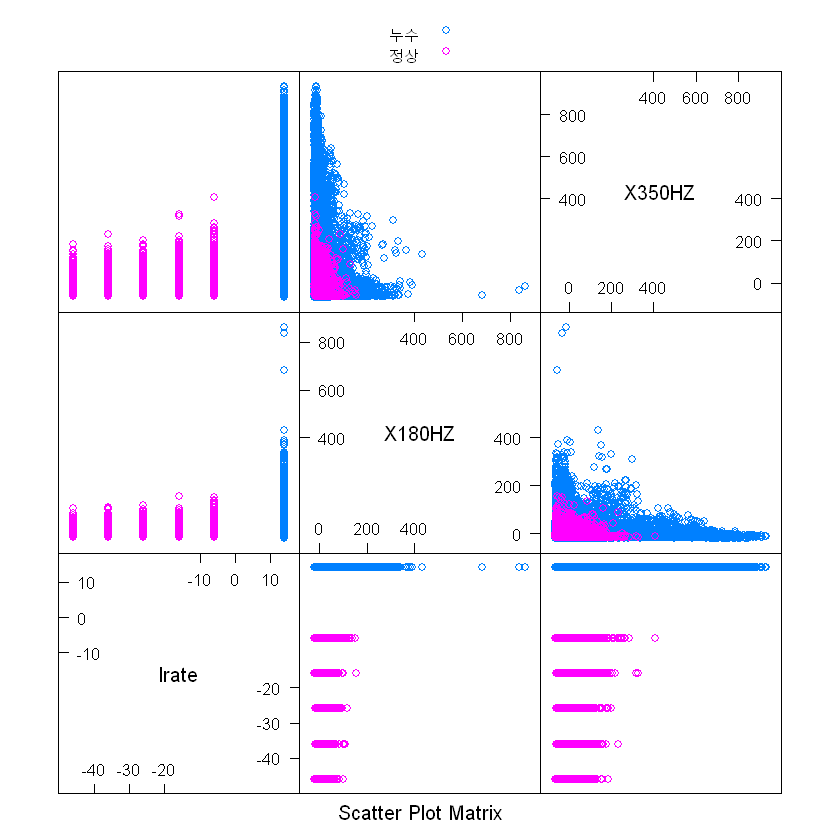

In [166]:
featurePlot(x=x, y=y, plot = "pairs", auto.key = TRUE)

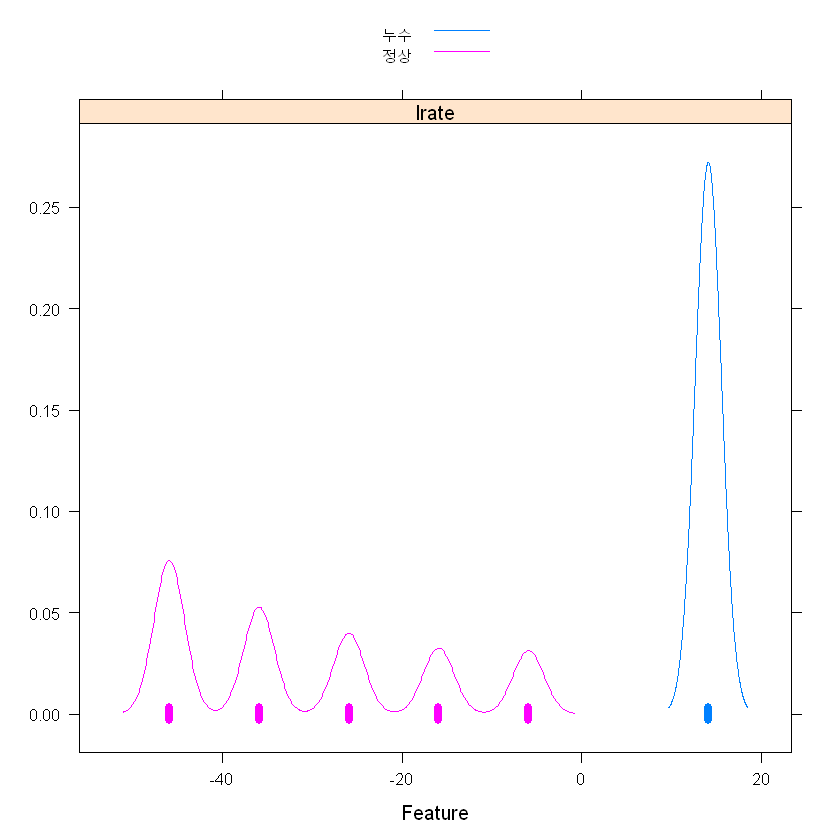

In [167]:
featurePlot(x = x['lrate'], y = y, plot = "density", auto.key = TRUE)

###### 산점도 행렬 확인 결과
###### lrate는 비선형적인 분포를 보이고 있으며, 값이 특정 범위에 밀집된 것을 확인. 
###### 해당 변수 단독으로 분류 모델을 구축할 수 있음을 확인했으나,
###### 다른 변수까지 활용하는 것이 데이터의 다양한 측면을 충분히 반영하고 모델의 설명력을 높일 것으로 판단. 
###### 즉, 여러 변수를 함께 고려하여 종합적으로 분석하기로 최종 결정.

### 데이터 통합

In [168]:
df<-cbind(x,y)
df

lrate,X180HZ,X350HZ,y
14.07607,-3.2571749,-28.612952,누수
14.07607,15.7428251,-10.612952,누수
14.07607,12.7428251,-43.612952,누수
14.07607,-14.2571749,162.387048,누수
14.07607,-9.2571749,-27.612952,누수
14.07607,-3.2571749,-27.612952,누수
14.07607,25.7428251,-21.612952,누수
14.07607,0.7428251,-24.612952,누수
14.07607,43.7428251,120.387048,누수
14.07607,45.7428251,133.387048,누수


### 학습/검증 데이터 분리

In [169]:
#libray(caret)
set.seed(22)
index<-createDataPartition(df$y, p=0.7, list=FALSE)

train<-df[index,]
test<-df[-index,]

table(train$y)
table(test$y)

prop.table(table(train$y))
prop.table(table(test$y))


 누수  정상 
33753 15517 


 누수  정상 
14465  6649 


     누수      정상 
0.6850619 0.3149381 


     누수      정상 
0.6850905 0.3149095 

In [170]:
train[-'y']

ERROR: Error in -"y": 단항연산자에 유효한 인자가 아닙니다


# 모델링

### KNN

In [189]:
#library(class)
fit_knn_time<-system.time({
  fit_knn<-knn(train[,-4], test[,-4], train$y, k = 3)
})
fit_knn_time
#fit_knn

tabs<-xtabs(~fit_knn+test$y)

#library(caret)
confusionMatrix(tabs)

   user  system elapsed 
   2.65    0.00    3.38 

Confusion Matrix and Statistics

       test$y
fit_knn  누수  정상
   누수 14465     3
   정상     0  6646
                                     
               Accuracy : 0.9999     
                 95% CI : (0.9996, 1)
    No Information Rate : 0.6851     
    P-Value [Acc > NIR] : <2e-16     
                                     
                  Kappa : 0.9997     
                                     
 Mcnemar's Test P-Value : 0.2482     
                                     
            Sensitivity : 1.0000     
            Specificity : 0.9995     
         Pos Pred Value : 0.9998     
         Neg Pred Value : 1.0000     
             Prevalence : 0.6851     
         Detection Rate : 0.6851     
   Detection Prevalence : 0.6852     
      Balanced Accuracy : 0.9998     
                                     
       'Positive' Class : 누수       
                                     

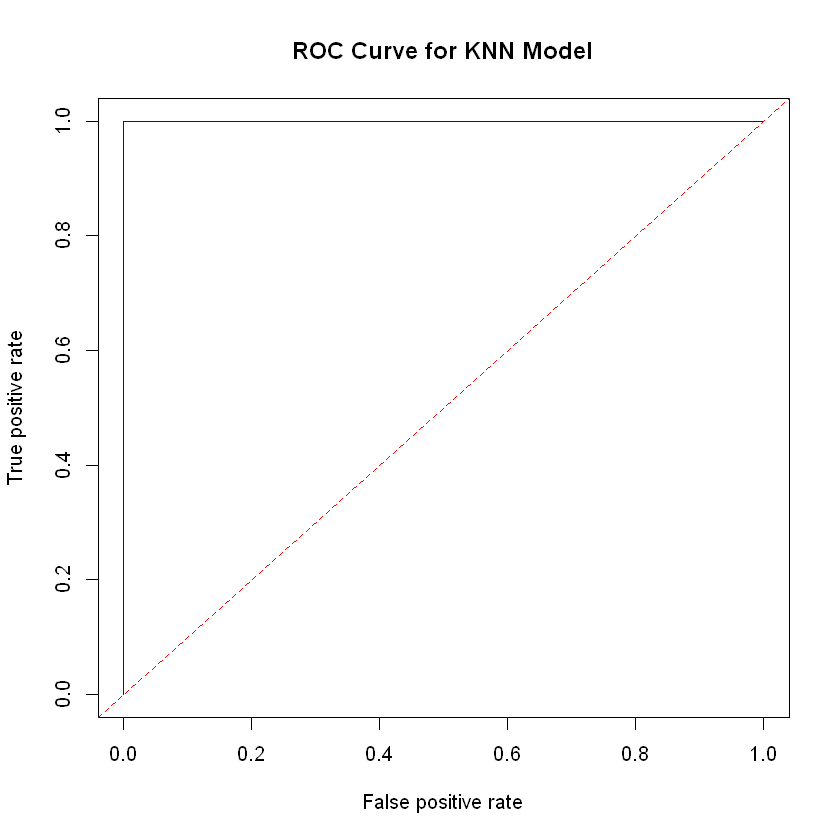

In [190]:
#library(ROCR)
pred_knn <- as.numeric(fit_knn) - 1
pred_knn_obj <- prediction(pred_knn, test$y)
perf_knn <- performance(pred_knn_obj, "tpr", "fpr")

plot(perf_knn, col = "blue", main = "ROC Curve for KNN Model")
abline(a = 0, b = 1, lty = 2, col = "red")

### Decision Tree

In [191]:
#library(rpart)
fit_rpart_time<-system.time({
  fit_rpart<-rpart(y ~ ., data=train, method="class")
})
fit_rpart_time
fit_rpart

pred_rpart<-predict(fit_rpart, newdata = test[,-4], type = "class")
tabs2<-xtabs(~pred_rpart+test$y)

#library(caret)
confusionMatrix(tabs2)

   user  system elapsed 
   0.03    0.00    0.06 

n= 49270 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 49270 15517 누수 (0.6850619 0.3149381)  
  2) lrate>=4.076068 33753     0 누수 (1.0000000 0.0000000) *
  3) lrate< 4.076068 15517     0 정상 (0.0000000 1.0000000) *

Confusion Matrix and Statistics

          test$y
pred_rpart  누수  정상
      누수 14465     0
      정상     0  6649
                                     
               Accuracy : 1          
                 95% CI : (0.9998, 1)
    No Information Rate : 0.6851     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.0000     
            Specificity : 1.0000     
         Pos Pred Value : 1.0000     
         Neg Pred Value : 1.0000     
             Prevalence : 0.6851     
         Detection Rate : 0.6851     
   Detection Prevalence : 0.6851     
      Balanced Accuracy : 1.0000     
                                     
       'Positive' Class : 누수       
                                     

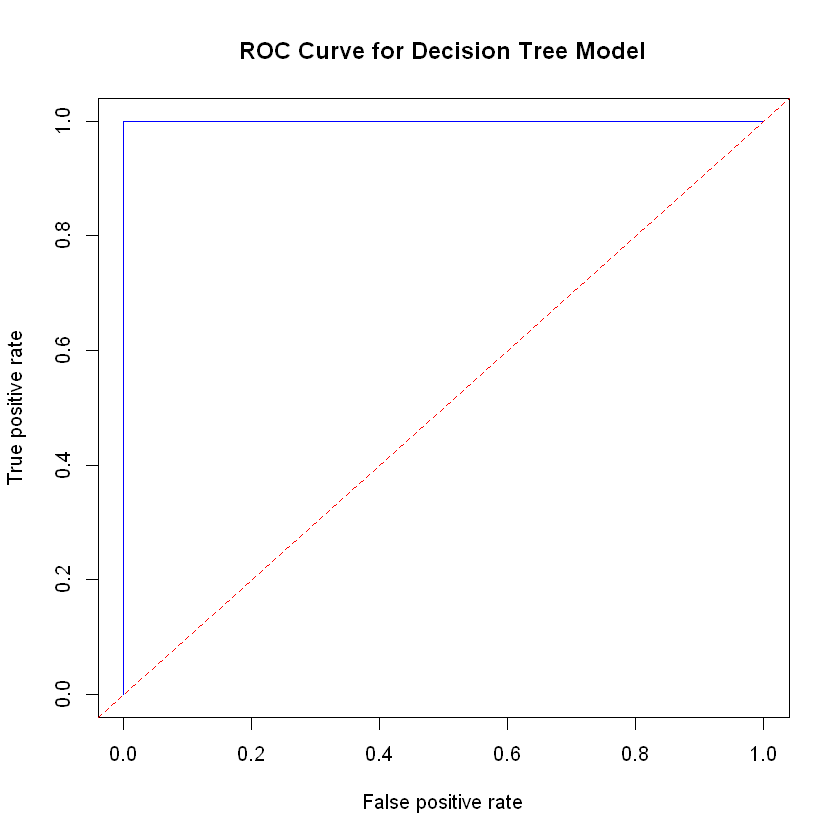

In [192]:
#library(ROCR)
pred_rpart <- ifelse(pred_rpart == "누수", 0, 1)
pred_rpart_obj <- prediction(pred_rpart, test$y)

perf_rpart <- performance(pred_rpart_obj, "tpr", "fpr")

plot(perf_rpart, col = "blue", main = "ROC Curve for Decision Tree Model")
abline(a = 0, b = 1, lty = 2, col = "red")

### Random Forest

In [187]:
#library(randomForest)
fit_rf_time<-system.time({
  fit_rf<-randomForest(y ~ ., data=train)
})
fit_rf_time
fit_rf

pred_rf<-predict(fit_rf, newdata = test[,-4])
tabs3<-xtabs(~pred_rf+test$y)

#library(caret)
confusionMatrix(tabs3)

   user  system elapsed 
   3.44    0.10    4.44 


Call:
 randomForest(formula = y ~ ., data = train) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 1

        OOB estimate of  error rate: 0%
Confusion matrix:
      누수  정상 class.error
누수 33753     0           0
정상     0 15517           0

Confusion Matrix and Statistics

       test$y
pred_rf  누수  정상
   누수 14465     0
   정상     0  6649
                                     
               Accuracy : 1          
                 95% CI : (0.9998, 1)
    No Information Rate : 0.6851     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.0000     
            Specificity : 1.0000     
         Pos Pred Value : 1.0000     
         Neg Pred Value : 1.0000     
             Prevalence : 0.6851     
         Detection Rate : 0.6851     
   Detection Prevalence : 0.6851     
      Balanced Accuracy : 1.0000     
                                     
       'Positive' Class : 누수       
                                     

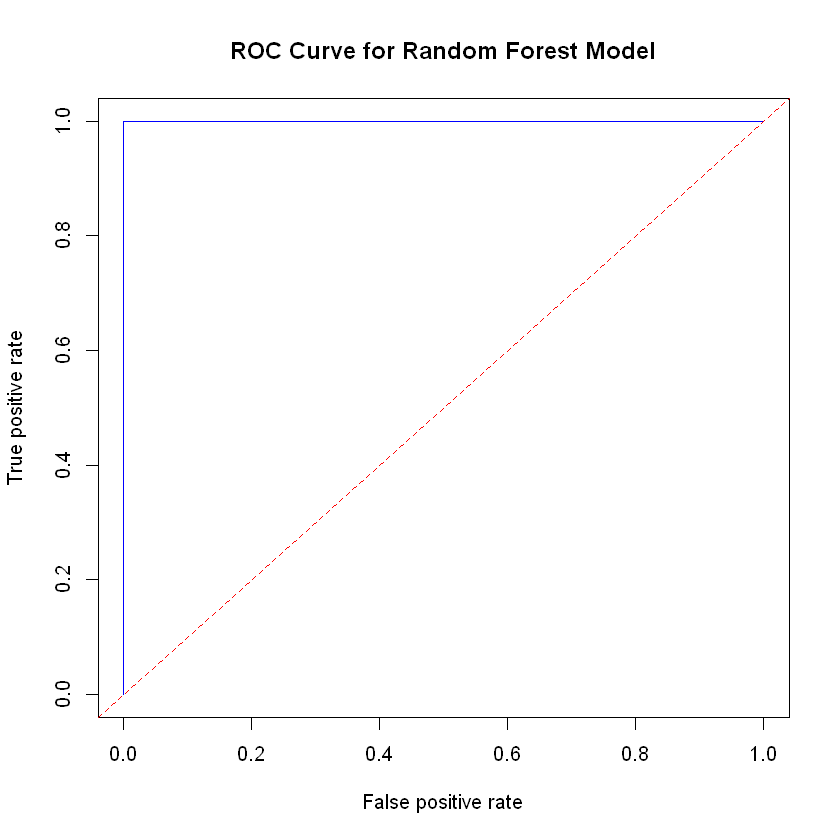

In [188]:
#library(ROCR)
pred_rf <- ifelse(pred_rf == "누수", 0, 1)
pred_rf_obj <- prediction(pred_rf, test$y)

perf_rf <- performance(pred_rf_obj, "tpr", "fpr")

plot(perf_rf, col = "blue", main = "ROC Curve for Random Forest Model")
abline(a = 0, b = 1, lty = 2, col = "red")

### SVM

In [193]:
#library(e1071)
fit_svm_time<-system.time({
  fit_svm<-svm(y ~ ., data=train)
})
fit_svm_time
fit_svm

pred_svm<-predict(fit_svm, newdata = test[,-4])
tabs5<-xtabs(~pred_svm+test$y)

#library(caret)
confusionMatrix(tabs5)

   user  system elapsed 
   1.30    0.00    2.57 


Call:
svm(formula = y ~ ., data = train)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  224


Confusion Matrix and Statistics

        test$y
pred_svm  누수  정상
    누수 14465     0
    정상     0  6649
                                     
               Accuracy : 1          
                 95% CI : (0.9998, 1)
    No Information Rate : 0.6851     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.0000     
            Specificity : 1.0000     
         Pos Pred Value : 1.0000     
         Neg Pred Value : 1.0000     
             Prevalence : 0.6851     
         Detection Rate : 0.6851     
   Detection Prevalence : 0.6851     
      Balanced Accuracy : 1.0000     
                                     
       'Positive' Class : 누수       
                                     

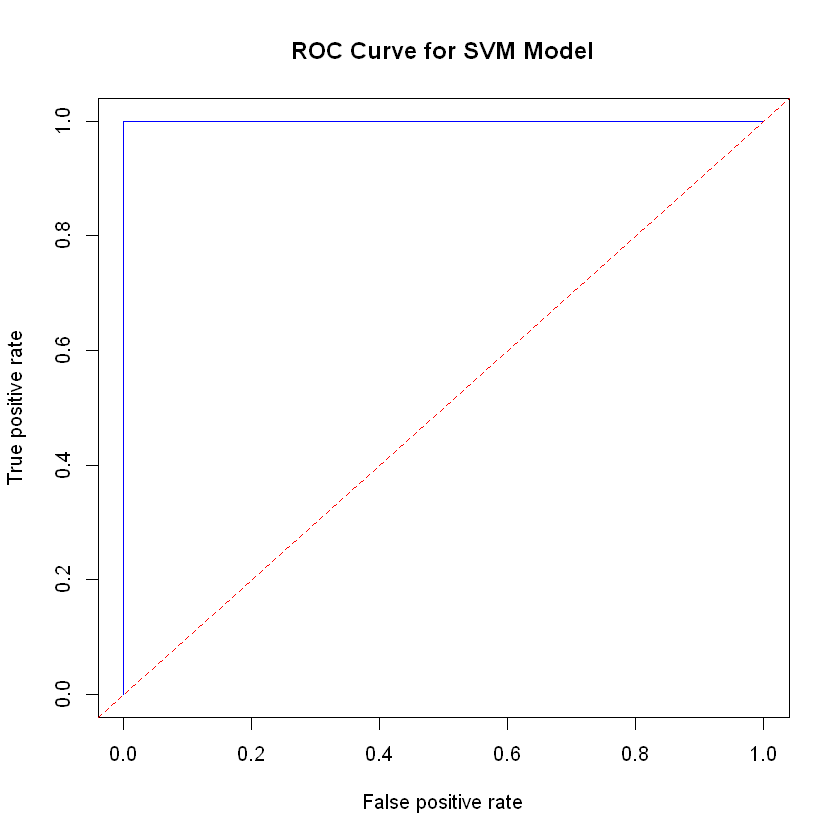

In [195]:
#library(ROCR)
pred_svm <- ifelse(pred_svm == "누수", 0, 1)
pred_svm_obj <- prediction(pred_svm, test$y)

perf_svm <- performance(pred_svm_obj, "tpr", "fpr")

plot(perf_rf, col = "blue", main = "ROC Curve for SVM Model")
abline(a = 0, b = 1, lty = 2, col = "red")

### Naive Bayes

In [199]:
#library(e1071)
fit_nb_time<-system.time({
  fit_nb<-naiveBayes(y ~ ., data=train)
})
fit_nb_time
fit_nb

pred_nb<-predict(fit_nb, newdata = test[,-4])
tabs6<-xtabs(~pred_nb+test$y)

#library(caret)
confusionMatrix(tabs6)

   user  system elapsed 
   0.01    0.00    0.02 


Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = X, y = Y, laplace = laplace)

A-priori probabilities:
Y
     누수      정상 
0.6850619 0.3149381 

Conditional probabilities:
      lrate
Y           [,1]     [,2]
  누수  14.07607  0.00000
  정상 -30.65745 14.11801

      X180HZ
Y            [,1]     [,2]
  누수   4.620406 29.48527
  정상 -10.044441 10.67410

      X350HZ
Y           [,1]      [,2]
  누수  20.63494 126.81956
  정상 -43.73649  32.79113


Confusion Matrix and Statistics

       test$y
pred_nb  누수  정상
   누수 14465   283
   정상     0  6366
                                         
               Accuracy : 0.9866         
                 95% CI : (0.985, 0.9881)
    No Information Rate : 0.6851         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.9686         
                                         
 Mcnemar's Test P-Value : < 2.2e-16      
                                         
            Sensitivity : 1.0000         
            Specificity : 0.9574         
         Pos Pred Value : 0.9808         
         Neg Pred Value : 1.0000         
             Prevalence : 0.6851         
         Detection Rate : 0.6851         
   Detection Prevalence : 0.6985         
      Balanced Accuracy : 0.9787         
                                         
       'Positive' Class : 누수           
                                         

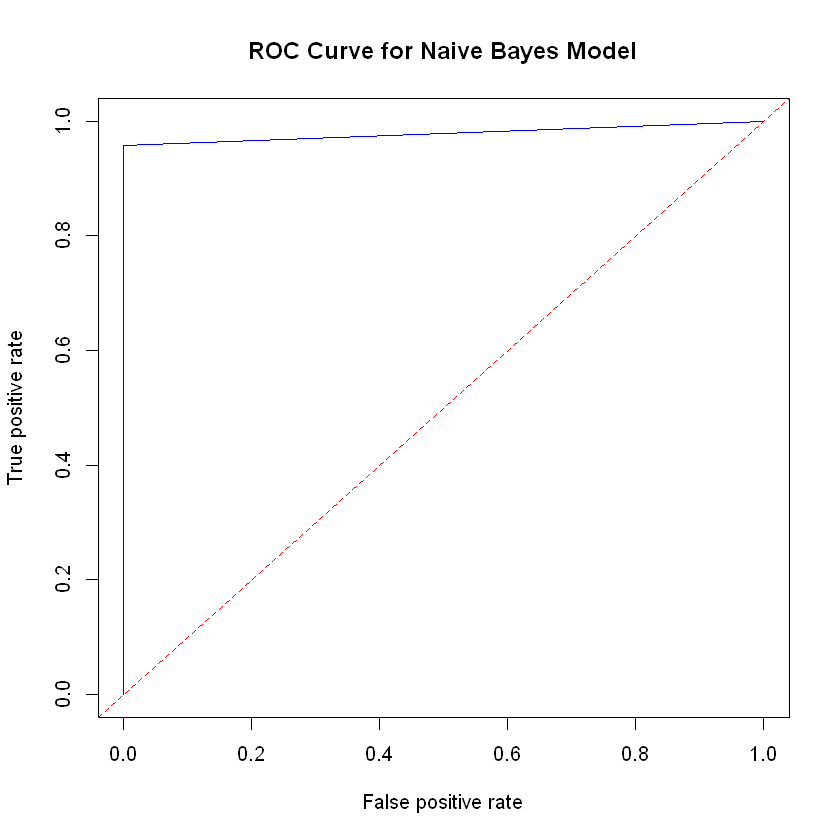

In [200]:
pred_nb <- ifelse(pred_nb == "누수", 0, 1)
pred_nb_obj <- prediction(pred_nb, test$y)
perf_nb <- performance(pred_nb_obj, "tpr", "fpr")

plot(perf_nb, col = "blue", main = "ROC Curve for Naive Bayes Model")
abline(a = 0, b = 1, lty = 2, col = "red")

# 모델 저장

In [201]:
saveRDS(fit_rpart, file = "model_rpart.rds")

In [202]:
saveRDS(fit_rf, file = "model_rf.rds")

In [203]:
saveRDS(fit_svm, file = "model_svm.rds")

In [205]:
list.files()

[1] "merged_data.csv"                                                     
[2] "model_rf.rds"                                                        
[3] "model_rpart.rds"                                                     
[4] "model_svm.rds"                                                       
[5] "데이터 마이닝 프로젝트 - 머신러닝을 활용한 상수도관 누수 감지 .ipynb"
[6] "상하수도 데이터(상수관로 누수 감지)"